In [1]:
import tensorflow as tf
print(tf.__version__)

1.12.0


In [3]:
minist = tf.keras.datasets.fashion_mnist

In [5]:
(training_images, training_labels), (test_images, test_labels) = minist.load_data()

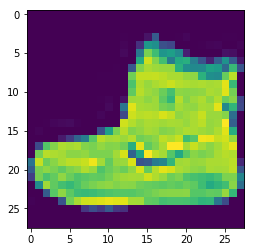

In [7]:
import matplotlib.pyplot as plt
plt.imshow(training_images[0])

In [9]:
print(training_labels[0])
print(training_images[0].shape)

9
(28, 28)


In [10]:
training_images = training_images / 255.0
test_images = test_images / 255.0

In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 75us/step - loss: 0.2821 - acc: 0.8956
Epoch 2/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2691 - acc: 0.9010
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2580 - acc: 0.9037
Epoch 4/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2478 - acc: 0.9083
Epoch 5/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2375 - acc: 0.9120


In [14]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 48us/step


[0.3443570673465729, 0.8816]

In [16]:
classification = model.predict(test_images)
print(len(test_images))
print(classification[0])
print(test_labels[0])

10000
[5.4648126e-07 5.4255491e-07 8.7520959e-09 8.1065491e-07 1.1702584e-07
 4.4478453e-04 9.3631834e-06 3.6937427e-02 4.3626247e-07 9.6260601e-01]
9


In [17]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.12.0
Epoch 1/5
60000/60000 [==============================] - 42s 700us/step - loss: 0.1855
Epoch 2/5
60000/60000 [==============================] - 41s 686us/step - loss: 0.0741
Epoch 3/5
60000/60000 [==============================] - 42s 703us/step - loss: 0.0474
Epoch 4/5
60000/60000 [==============================] - 42s 704us/step - loss: 0.0350
Epoch 5/5
10000/10000 [==============================] - 1s 127us/step
[2.9683428e-10 1.0125437e-09 6.2688290e-09 3.7598415e-08 2.8773151e-16
 3.0711521e-12 2.3526228e-13 1.0000000e+00 8.1134807e-11 1.6168186e-09]
7


In [19]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.4):
            print("\nReached 60% accuracy so cancelling training!")
            self.model.stop_training = True


1.12.0


In [20]:
callbacks = myCallback()

In [21]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

In [22]:
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
60000/60000 [==============================] - 22s 366us/step - loss: 0.4721
Epoch 2/5
59840/60000 [============================>.] - ETA: 0s - loss: 0.3616-
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 22s 361us/step - loss: 0.3614


In [23]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 24s 394us/step - loss: 0.1990 - acc: 0.9419
Epoch 2/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0789 - acc: 0.9759
Epoch 3/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0525 - acc: 0.9836
Epoch 4/10
60000/60000 [==============================] - 23s 388us/step - loss: 0.0361 - acc: 0.9881
Epoch 5/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.0266 - acc: 0.9918
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 23s 384us/step - loss: 0.0265 - acc: 0.9918
